# Per-Project Summary Statistics

In [1]:
!pwd

/home/michael/dev/hca-summary-stats/notebook


In [3]:
import os
homepath = os.path.join(os.path.expanduser("~"), 'dev/hca-summary-stats')
os.chdir(homepath)
import scanpy as sc
import loompy

In [4]:
!pwd

/home/michael/dev/hca-summary-stats


In [6]:
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O test/data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd test/data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz

--2019-07-19 10:48:35--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.224.2.107, 13.224.2.12, 13.224.2.82, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.224.2.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘test/data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

test/data/pbmc3k_fi 100%[===================>]   7.27M  9.50MB/s    in 0.8s    

2019-07-19 10:48:37 (9.50 MB/s) - ‘test/data/pbmc3k_filtered_gene_bc_matrices.tar.gz’ saved [7621991/7621991]



In [46]:
adata = sc.read_10x_mtx(
    './test/data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)

In [50]:
sc.settings.set_figure_params(dpi=200)

In [51]:
adata.obs

""
0
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
AAACGCACTGGTAC-1
AAACGCTGACCAGT-1
AAACGCTGGTTCTT-1
AAACGCTGTAGCCA-1


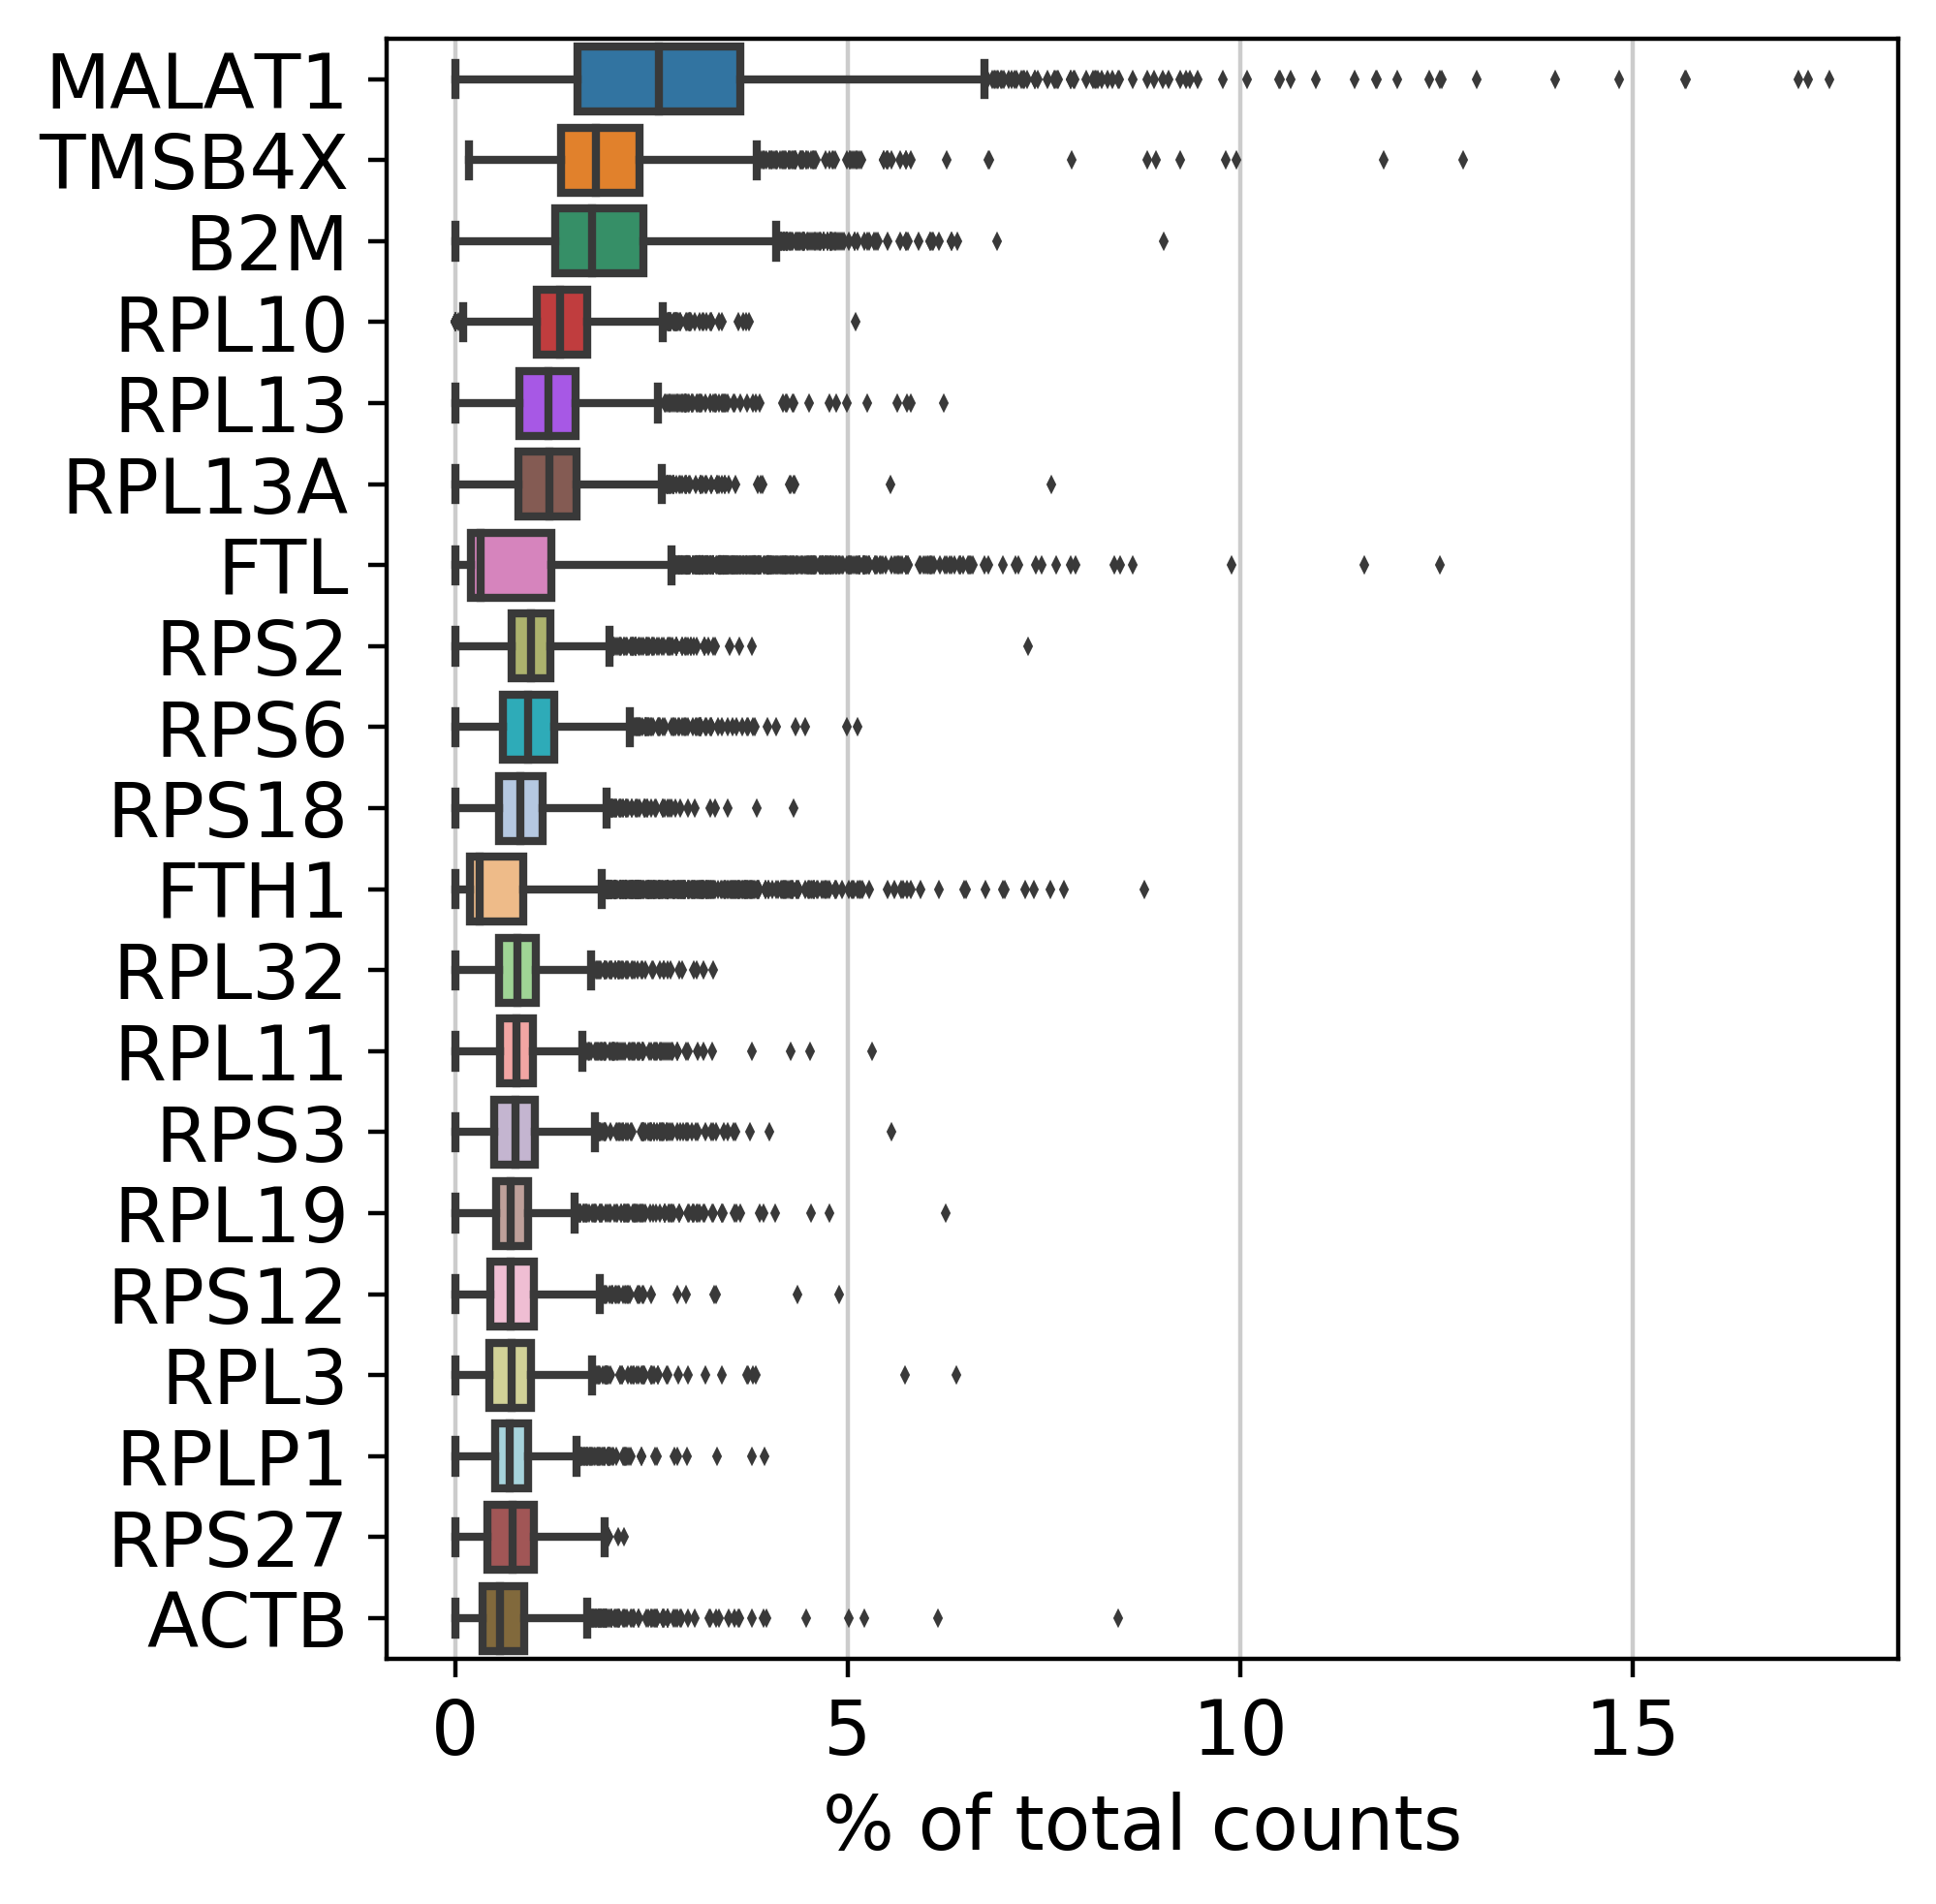

In [52]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [19]:
loomfile = 'test/data/f9e363cd-7fa5-4349-add2-1c9bd86d10c8.loom'
adata1 = sc.read(loomfile, sparse=True, cleanup=False, X_name='spliced', obs_names='CellID')
adata1.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [20]:
adata1.var_names

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'BX005132.2', 'AL645728.2', 'PDE11A-1', 'AL163152.1', 'AL139254.3',
       'AL591163.1', 'AL589702.1', 'AC068587.10', 'AL034417.4', 'AL513220.1'],
      dtype='object', length=63925)

In [21]:
adata1

AnnData object with n_obs × n_vars = 757 × 63925 
    obs: 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_part_label', 'derived_organ_part_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_preparation_protocol.input_nucleic_acid_molecule.ontology', 'library_preparation_protocol.input_nucleic_acid_molecule.ontology_label', 'library_preparation_protocol.library_construction_method.ontology', 'library_preparation_protocol.library_construction_method.ontology_label', 'library_preparation_protocol.provenance.document_id', 'library_preparation_protocol.strand', 'project.project_core.project_short_name', 'specimen_from_organism

In [22]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

In [25]:
loom = loompy.connect(loomfile)
loom

,,,,,,,CellID,00f8d4a4-ecf5-411c-bfe2-6e82a6d86b2f,03ed5204-f11e-4633-a930-4841e3ec16d3,054e20d8-c48a-4790-b179-d9df837905b9,0bb3a24d-bb05-44c8-8154-1ccb30ff8420,0c79d510-067c-4103-ba08-295a10a522ae,104f7011-4a64-49a2-a20b-f4824ec8b3d3,1227882d-d6be-43dc-be0b-270b163fe8f4,16137206-c627-43e5-b7f6-b60db7920e0e,164fd3ac-cf1b-46f6-be05-cf582eb61d58,17e0e690-6e31-4e27-a325-0fecc9c2682f,...
,,,,,,,cell_suspension.provenance.document_id,00f8d4a4-ecf5-411c-bfe2-6e82a6d86b2f,03ed5204-f11e-4633-a930-4841e3ec16d3,054e20d8-c48a-4790-b179-d9df837905b9,0bb3a24d-bb05-44c8-8154-1ccb30ff8420,0c79d510-067c-4103-ba08-295a10a522ae,104f7011-4a64-49a2-a20b-f4824ec8b3d3,1227882d-d6be-43dc-be0b-270b163fe8f4,16137206-c627-43e5-b7f6-b60db7920e0e,164fd3ac-cf1b-46f6-be05-cf582eb61d58,17e0e690-6e31-4e27-a325-0fecc9c2682f,...
,,,,,,,derived_organ_label,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,...
,,,,,,,derived_organ_ontology,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,...
,,,,,,,derived_organ_part_label,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,...
,,,,,,,derived_organ_part_ontology,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,...
,,,,,,,donor_organism.development_stage.ontology,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...
,,,,,,,donor_organism.development_stage.ontology_label,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...
,,,,,,,donor_organism.diseases.ontology,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,...
,,,,,,,donor_organism.diseases.ontology_label,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...
,,,,,,,donor_organism.human_specific.ethnicity.ontology,HANCESTRO:0005,HANCESTRO:0008,HANCESTRO:0005,HANCESTRO:0016,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0008,HANCESTRO:0005,...


In [26]:
sc.pl.highest_expr_genes(loom, n_top=20)

AttributeError: 'LoomConnection' object has no attribute 'copy'

First row of `mtxfile/genes.tsv` is featurekey	featurename	featuretype	chromosome	featurestart	featureend	isgene.

In [59]:
adata = sc.read_10x_mtx(
    './test/data/mtxfile',      # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (variables-axis index)
    cache=True)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [60]:
adata

AnnData object with n_obs × n_vars = 2544 × 63925 
    var: 'gene_ids'

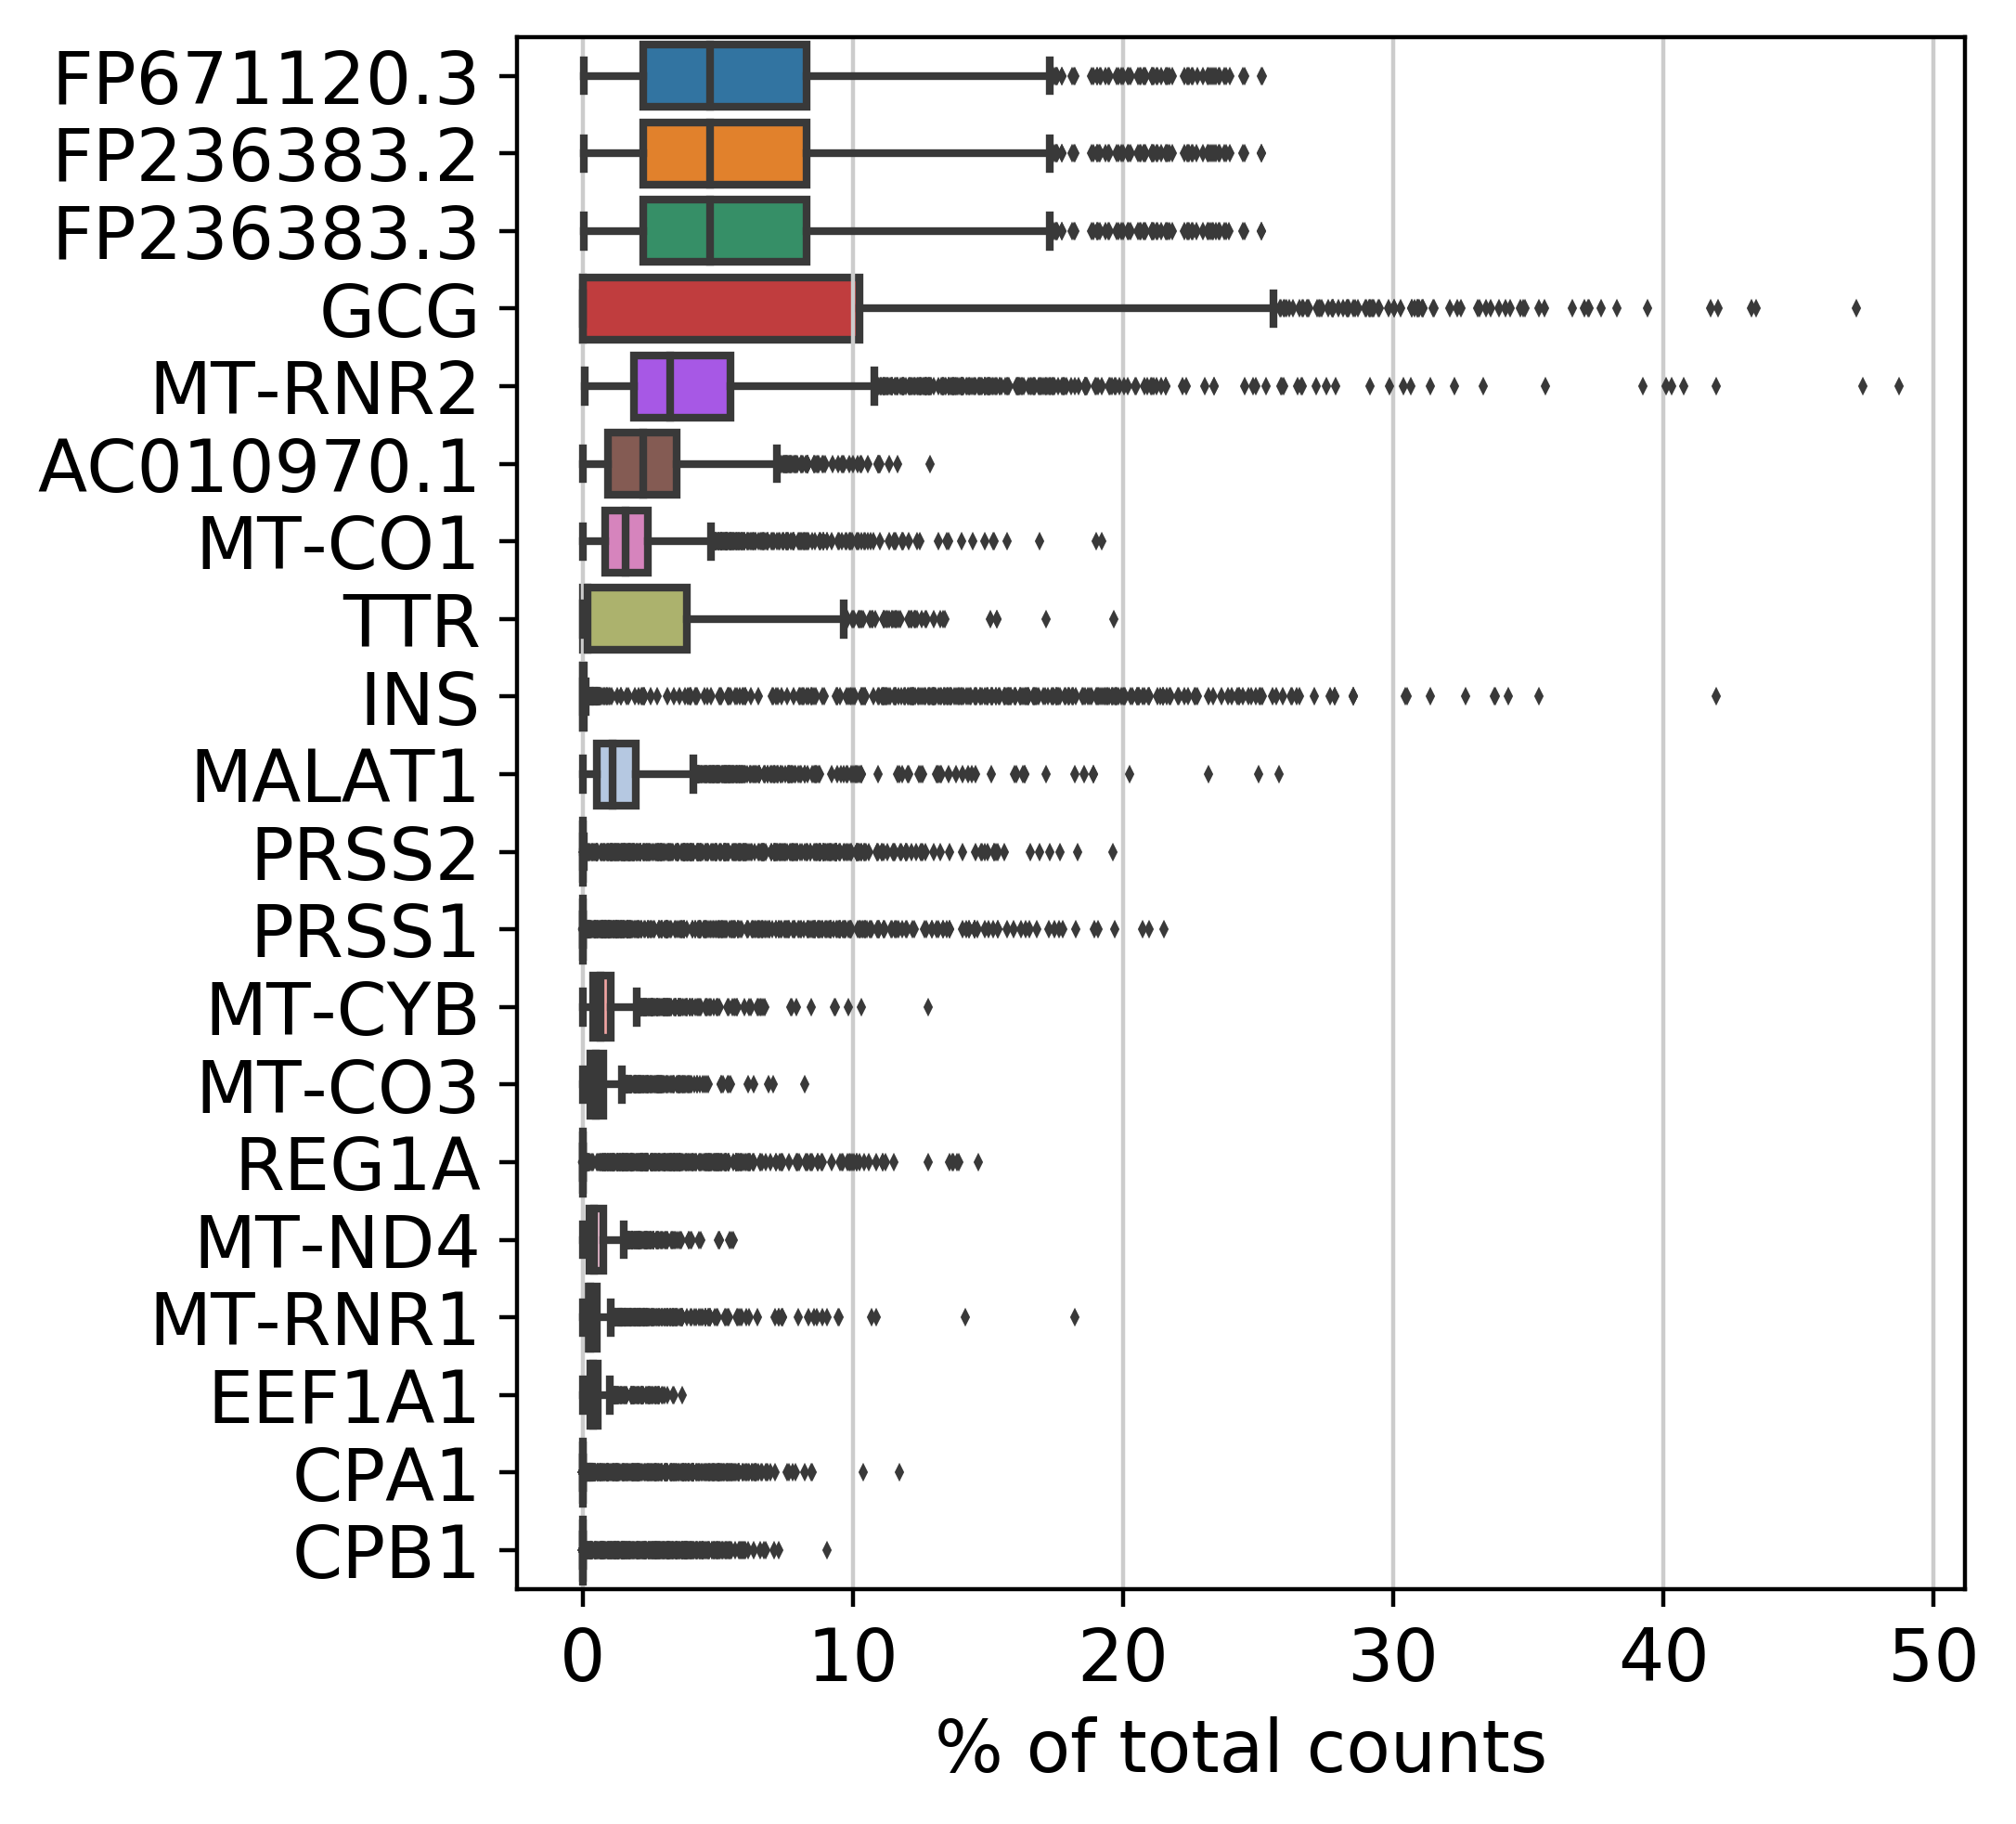

In [61]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [43]:
group_key = adata.obs['cell_suspension.provenance.document_id']
#sc.pl.stacked_violin(adata, list(adata.var_names)[:5], swap_axis=True)
sc.pl.stacked_violin(adata[:10], expression_variance, grouby=group_key, swap_axis=True, use_raw=False)

KeyError: 'cell_suspension.provenance.document_id'

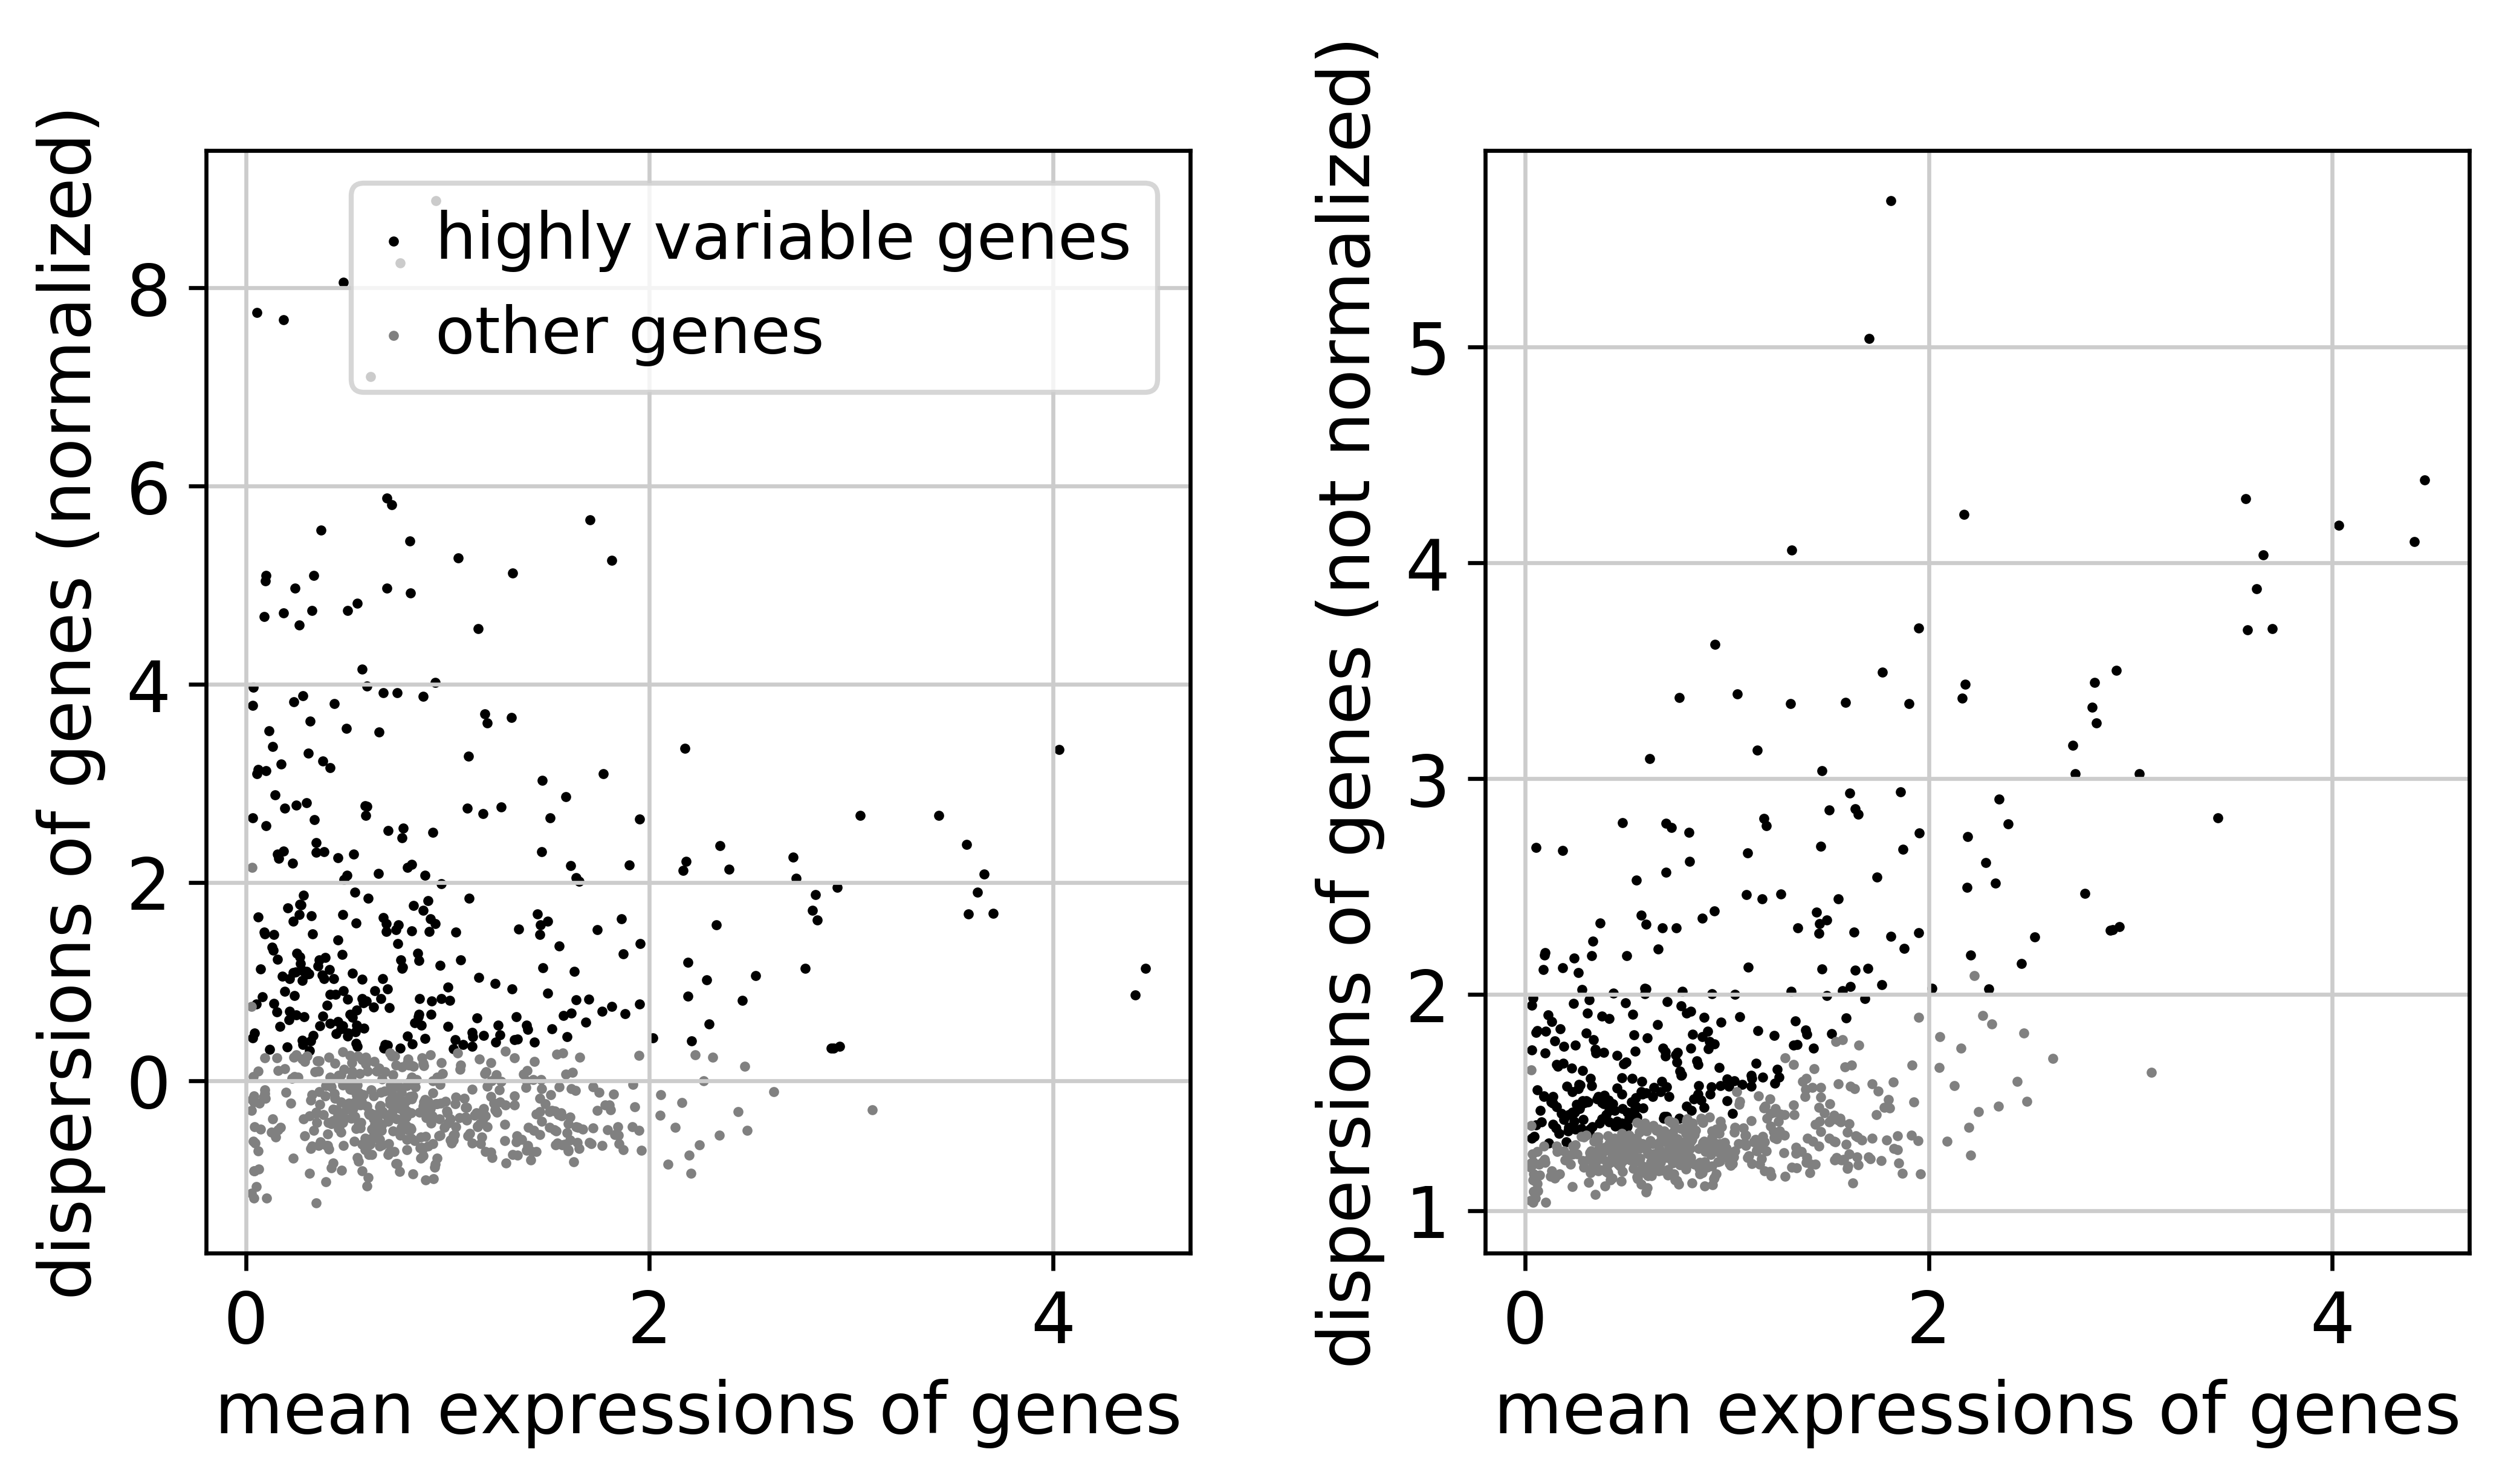

In [28]:
adata = sc.datasets.pbmc68k_reduced()  # scanpy demo data
sc.pl.highly_variable_genes(adata)

In [29]:
adata.obs

,bulk_labels,n_genes,percent_mito,n_counts,S_score,G2M_score,phase,louvain
index,,,,,,,,
AAAGCCTGGCTAAC-1,CD14+ Monocyte,1003,0.023856,2557.0,-0.119160,-0.816889,G1,1
AAATTCGATGCACA-1,Dendritic,1080,0.027458,2695.0,0.067026,-0.889498,S,1
AACACGTGGTCTTT-1,CD56+ NK,1228,0.016819,3389.0,-0.147977,-0.941749,G1,3
AAGTGCACGTGCTA-1,CD4+/CD25 T Reg,1007,0.011797,2204.0,0.065216,1.469291,G2M,9
ACACGAACGGAGTG-1,Dendritic,1178,0.017277,3878.0,-0.122974,-0.868185,G1,2
ACAGTTCTTAGCCA-1,CD19+ B,1531,0.022347,4967.0,-0.028018,-0.912565,G1,8
ACATTCTGACTACG-1,Dendritic,1036,0.017159,2914.0,-0.181505,-0.617387,G1,5
ACCCTCGAGTGAGG-1,Dendritic,1250,0.010741,3817.0,-0.124939,-0.769430,G1,2
ACTGGCCTTTTCGT-1,CD8+ Cytotoxic T,1282,0.018118,4581.0,0.134635,-1.071574,S,3


In [ ]:
adata

In [30]:
adata.var

,n_counts,means,dispersions,dispersions_norm,highly_variable
index,,,,,
HES4,1153.387451,0.592365,2.028047,2.771764,True
TNFRSF4,304.358154,0.193332,1.760724,2.746426,True
SSU72,2530.272705,1.019981,1.208284,-0.631160,False
PARK7,7451.664062,1.828078,1.288261,-0.544716,False
RBP7,272.811035,0.174943,1.842789,3.192285,True
SRM,1951.078857,0.861733,1.579264,0.830446,True
MAD2L2,1020.823303,0.539625,1.256583,-0.364477,False
AGTRAP,1404.187622,0.685122,1.427224,0.329231,True
TNFRSF1B,1449.664551,0.701057,1.573476,0.923793,True
